# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_predict, KFold, train_test_split, cross_validate, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns


In [2]:
import os
os.getcwd()

'/content'

# Loading the data

In [4]:
dData = pd.read_csv("./fea_tests_2_5_bar_15_08_2021.csv")
print(dData.shape)
dData.head(6)

(3612, 205)


,note,C1,C2,C3,height1,height2,height3,height4,height5,height6,height7,height8,height9,height10,height11,height12,height13,height14,height15,height16,height17,height18,height19,height20,height21,height22,height23,height24,height25,height26,height27,height28,height29,height30,height31,height32,height33,height34,height35,height36,...,pressure62,pressure63,pressure64,pressure65,pressure66,pressure67,pressure68,pressure69,pressure70,pressure71,pressure72,pressure73,pressure74,pressure75,pressure76,pressure77,pressure78,pressure79,pressure80,pressure81,pressure82,pressure83,pressure84,pressure85,pressure86,pressure87,pressure88,pressure89,pressure90,pressure91,pressure92,pressure93,pressure94,pressure95,pressure96,pressure97,pressure98,pressure99,pressure100,notes
0,NaN,0.00114,0.000059,6.900000e-07,0.24289,0.55651,0.87303,1.198,1.5266,1.8562,2.1855,2.5137,2.8404,3.1655,3.4889,3.8108,4.1312,4.4502,4.768,5.0849,5.4008,5.7161,6.0309,6.3453,6.6595,6.9737,7.2881,7.6028,7.918,8.2338,8.5503,8.8678,9.1864,9.5063,9.8275,10.15,10.475,10.801,11.13,11.46,...,1.4086,1.4314,1.4541,1.4768,1.4995,1.5222,1.545,1.5677,1.5904,1.6131,1.6358,1.6586,1.6813,1.704,1.7267,1.7494,1.7722,1.7949,1.8176,1.8403,1.863,1.8858,1.9085,1.9312,1.9539,1.9766,1.9994,2.0221,2.0448,2.0675,2.0902,2.113,2.1357,2.1584,2.1811,2.2038,2.2266,2.2493,2.272,NaN
1,NaN,0.00004,0.000002,8.000000e-08,9.06390,19.56700,37.69700,61.251,77.7450,89.5410,98.7520,106.4800,113.2100,119.0600,124.4300,129.3500,133.9000,138.1500,142.140,145.9000,149.4700,152.8600,156.1300,159.2300,162.2100,165.0000,167.7700,170.4500,173.040,175.5600,178.0000,180.3700,182.6800,184.9300,187.1200,189.26,191.350,193.400,195.40,197.36,...,1.4086,1.4314,1.4541,1.4768,1.4995,1.5222,1.545,1.5677,1.5904,1.6131,1.6358,1.6586,1.6813,1.704,1.7267,1.7494,1.7722,1.7949,1.8176,1.8403,1.863,1.8858,1.9085,1.9312,1.9539,1.9766,1.9994,2.0221,2.0448,2.0675,2.0902,2.113,2.1357,2.1584,2.1811,2.2038,2.2266,2.2493,2.272,NaN
2,NaN,0.00004,0.000002,1.810000e-07,9.05880,19.52000,35.97100,53.663,66.0480,74.8840,81.9210,87.7420,92.8370,97.3600,101.4400,105.1800,108.6400,111.8600,114.920,117.6800,120.4800,122.9600,125.4100,127.7700,130.0300,132.2100,134.3100,136.3500,138.310,140.2200,142.0600,143.8600,145.6100,147.3100,148.9700,150.59,152.180,153.720,155.24,156.72,...,1.4086,1.4314,1.4541,1.4768,1.4995,1.5222,1.545,1.5677,1.5904,1.6131,1.6358,1.6586,1.6813,1.704,1.7267,1.7494,1.7722,1.7949,1.8176,1.8403,1.863,1.8858,1.9085,1.9312,1.9539,1.9766,1.9994,2.0221,2.0448,2.0675,2.0902,2.113,2.1357,2.1584,2.1811,2.2038,2.2266,2.2493,2.272,NaN
3,NaN,0.00004,0.000002,2.820000e-07,9.05710,19.47400,34.72400,49.700,60.1700,67.8140,73.9110,78.8930,83.2840,87.1860,90.7110,93.9380,96.9210,99.7390,102.260,104.7100,107.0500,109.2700,111.4000,113.4300,115.3800,117.2600,119.0800,120.8300,122.520,124.1600,125.7600,127.3100,128.8200,130.2800,131.7200,133.11,134.480,135.810,137.11,138.39,...,1.4086,1.4314,1.4541,1.4768,1.4995,1.5222,1.545,1.5677,1.5904,1.6131,1.6358,1.6586,1.6813,1.704,1.7267,1.7494,1.7722,1.7949,1.8176,1.8403,1.863,1.8858,1.9085,1.9312,1.9539,1.9766,1.9994,2.0221,2.0448,2.0675,2.0902,2.113,2.1357,2.1584,2.1811,2.2038,2.2266,2.2493,2.272,NaN
4,NaN,0.00004,0.000002,3.830000e-07,9.07550,19.42900,33.86900,47.166,56.4670,63.3660,68.7280,73.2990,77.2680,80.7940,83.9800,86.9380,89.5380,92.1450,94.422,96.6410,98.7530,100.7600,102.6800,104.5200,106.2900,107.9900,109.6300,111.2100,112.740,114.2200,115.6600,117.0600,118.4300,119.7500,121.0500,122.31,123.540,124.750,125.92,127.08,...,1.4086,1.4314,1.4541,1.4768,1.4995,1.5222,1.545,1.5677,1.5904,1.6131,1.6358,1.6586,1.6813,1.704,1.7267,1.7494,1.7722,1.7949,1.8176,1.8403,1.863,1.8858,1.9085,1.9312,1.9539,1.9766,1.9994,2.0221,2.0448,2.0675,2.0902,2.113,2.1357,2.1584,2.1811,2.2038,2.2266,2.2493,2.272,NaN
5,NaN,0.00004,0.000002,4.840000e-07,9.06530,19.38600,33.17100,45.300,53.7930,60.1310,65.0830,69.3070,72.9780,76.2410,79.1910,81.9300,84.3390,86.6620,88.850,90.9160,92.8740,94.7370,96.5160,98.2190,99.8540,101.4

# EDA

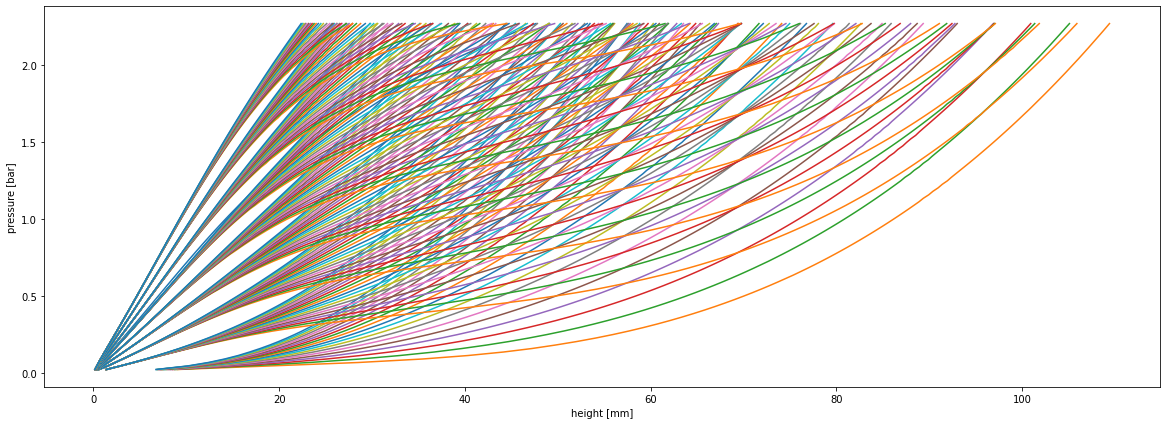

In [5]:
# Plotting some of the data
plt.figure(figsize=(20,7))
for ii in np.arange(0,len(dData),20):
    heghits = dData.iloc[ii,4:104].values
    pressures = dData.iloc[ii,104:-1].values
    plt.plot(heghits,pressures,label=ii)
plt.xlabel('height [mm]')
plt.ylabel('pressure [bar]')
plt.show()

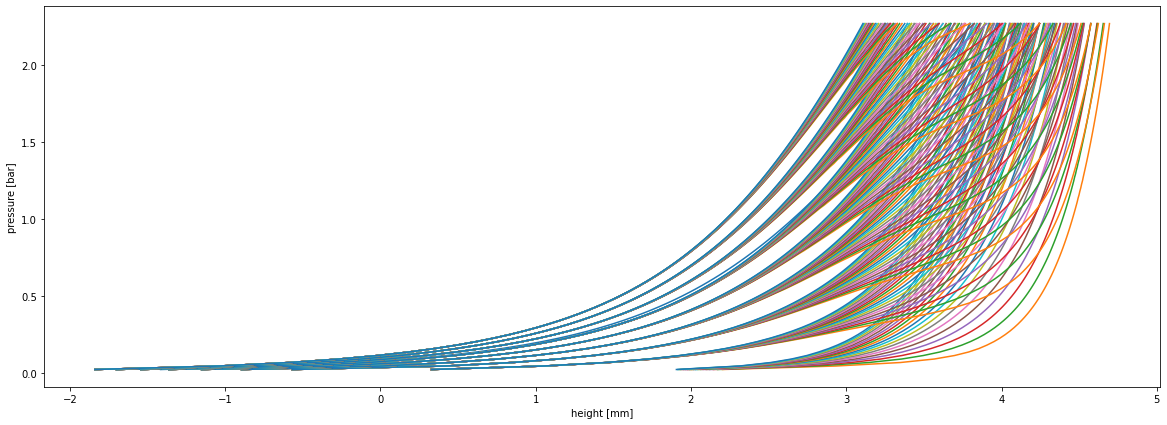

In [6]:
# Plotting log of the data
plt.figure(figsize=(20,7))
for ii in np.arange(0,len(dData),20):
    heghits = dData.iloc[ii,4:104].values
    pressures = dData.iloc[ii,104:-1].values
    plt.plot(np.log(heghits),pressures,label=ii)
plt.xlabel('height [mm]')
plt.ylabel('pressure [bar]')
plt.show()

In [7]:
dData.describe()

,note,C1,C2,C3,height1,height2,height3,height4,height5,height6,height7,height8,height9,height10,height11,height12,height13,height14,height15,height16,height17,height18,height19,height20,height21,height22,height23,height24,height25,height26,height27,height28,height29,height30,height31,height32,height33,height34,height35,height36,...,pressure62,pressure63,pressure64,pressure65,pressure66,pressure67,pressure68,pressure69,pressure70,pressure71,pressure72,pressure73,pressure74,pressure75,pressure76,pressure77,pressure78,pressure79,pressure80,pressure81,pressure82,pressure83,pressure84,pressure85,pressure86,pressure87,pressure88,pressure89,pressure90,pressure91,pressure92,pressure93,pressure94,pressure95,pressure96,pressure97,pressure98,pressure99,pressure100,notes
count,0.0,3612.000000,3612.000000,3.612000e+03,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,...,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3.612000e+03,3612.000000,3.611000e+03,3.611000e+03,3.611000e+03,3.611000e+03,3.611000e+03,3.611000e+03,0.0
mean,NaN,0.000877,0.000076,1.038268e-06,1.229309,2.273928,3.170930,3.987894,4.739163,5.445576,6.120660,6.771376,7.402892,8.019848,8.625195,9.221079,9.810643,10.395880,10.979354,11.563780,12.159513,12.752380,13.335728,13.910782,14.479578,15.042083,15.599341,16.152678,16.702376,17.249293,17.795622,18.340895,18.889020,19.462515,20.029884,20.590850,21.148175,21.703403,22.256233,22.807286,...,1.408600e+00,1.431400e+00,1.454100e+00,1.476800e+00,1.499500e+00,1.522200e+00,1.545000e+00,1.567700e+00,1.590400e+00,1.613100e+00,1.635800e+00,1.658600e+00,1.681300e+00,1.704000e+00,1.726700e+00,1.749400e+00,1.772200e+00,1.794900e+00,1.817600e+00,1.840300e+00,1.863000e+00,1.885800e+00,1.908500e+00,1.931200e+00,1.953900e+00,1.976600e+00,1.999400e+00,2.022100e+00,2.044800e+00,2.067500e+00,2.090200e+00,2.113000e+00,2.135698,2.158400e+00,2.181100e+00,2.203800e+00,2.226600e+00,2.249300e+00,2.272000e+00,NaN
std,NaN,0.000540,0.000045,5.829290e-07,2.289011,3.771754,5.011585,6.065498,6.910636,7.611758,8.220214,8.762733,9.257813,9.716474,10.147972,10.557830,10.952405,11.336462,11.716514,12.100366,12.528754,12.977596,13.406748,13.818945,14.216144,14.598941,14.969885,15.327617,15.674099,16.010420,16.338461,16.659263,16.976945,17.369349,17.729679,18.077425,18.416079,18.746549,19.070678,19.388271,...,2.709319e-14,5.107733e-14,5.618506e-14,3.819696e-14,8.083543e-14,6.395770e-14,5.618506e-14,8.238995e-14,4.019564e-14,1.074845e-13,1.643358e-14,1.443490e-14,1.190324e-13,4.508130e-14,1.039313e-13,6.817713e-14,1.025988e-13,7.461732e-14,8.416656e-14,1.006001e-13,7.150826e-14,1.643358e-14,1.809914e-13,9.993391e-15,1.678890e-13,3.442168e-14,9.793523e-14,8.794184e-14,1.270271e-13,9.371580e-14,1.270271e-13,9.682485e-14,0.000095,7.417317e-14,1.536761e-13,5.285393e-14,3.464376e-14,1.772161e-13,5.285393e-14,NaN
min,NaN,0.000040,0.000002,8.000000e-08,0.140420,0.311370,0.489930,0.675230,0.865060,1.057800,1.252500,1.448200,1.644400,1.840900,2.037300,2.233400,2.429100,2.624400,2.819200,3.013600,3.207300,3.400600,3.593400,3.785700,3.977600,4.169100,4.360100,4.550900,4.741300,4.931500,5.121500,5.311300,5.500900,5.690500,5.880000,6.069500,6.259100,6.448700,6.638400,6.828300,...,1.408600e+00,1.431400e+00,1.454100e+00,1.476800e+00,1.499500e+00,1.52220

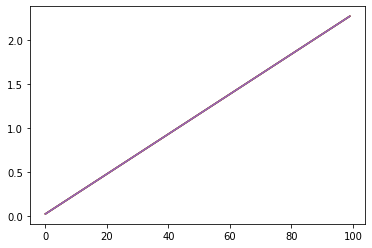

In [ ]:
# All pressure features are the same

mH = dData.iloc[:,4:104].values
mP = dData.iloc[:,104:-1].values
mC = dData.iloc[:,1:4]

plt.plot(mP[1,:])
plt.plot(mP[50,:])
plt.plot(mP[200,:])
plt.plot(mP[500,:])
plt.plot(mP[7000,:])


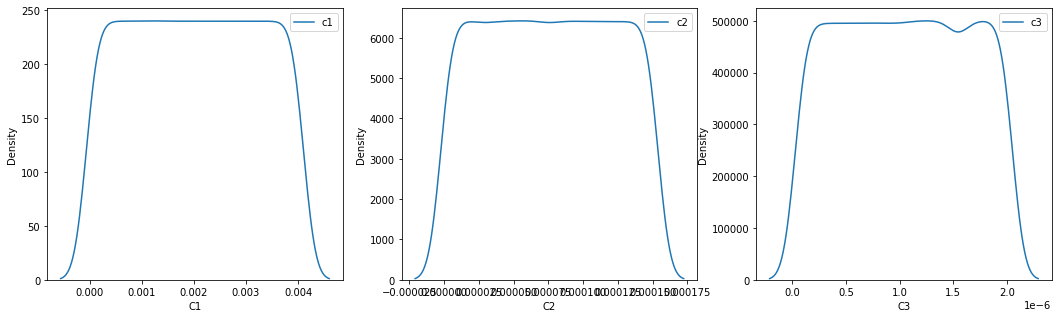

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.kdeplot(dData.iloc[:,1], label='c1')
plt.legend()
plt.subplot(1,3,2)
sns.kdeplot(dData.iloc[:,2], label='c2')
plt.legend()
plt.subplot(1,3,3)
sns.kdeplot(dData.iloc[:,3], label='c3')
plt.legend();

In [8]:
if 'google.colab' in str(get_ipython()):
    !npx degit FixelAlgorithmsTeam/FixelCourses/DeepLearningMethods/06_CNN/DeepLearningFramework ./DeepLearningFramework
    !pip install torchinfo

npx: installed 1 in 2.345s
> cloned FixelAlgorithmsTeam/FixelCourses#HEAD to ./DeepLearningFramework


In [10]:
from DeepLearningFramework.Training import TrainClassficationModel
import torch

In [ ]:
oTransform = transforms.Compose([
    transforms.ToTensor (),
    transforms.Normalize(mean, std)
])

oTrainSet.transform = oTransform
oTestSet .transform = oTransform

In [ ]:
mean = oTrainSet.data.float().mean() / 255
std  = oTrainSet.data.float().std () / 255
print('µ =', mean)
print('σ =', std)

# Making new features - fitting a poly line to the points

In [ ]:
# Data shuffling:
dData = dData.reindex(np.random.permutation(dData.index)).reset_index()
old_idx = dData['index'].values
dData.drop(columns=['index'], inplace=True)

# If re-ordering is required
# dData.index = old_idx
# dData = dData.reindex(range(len(dData)))

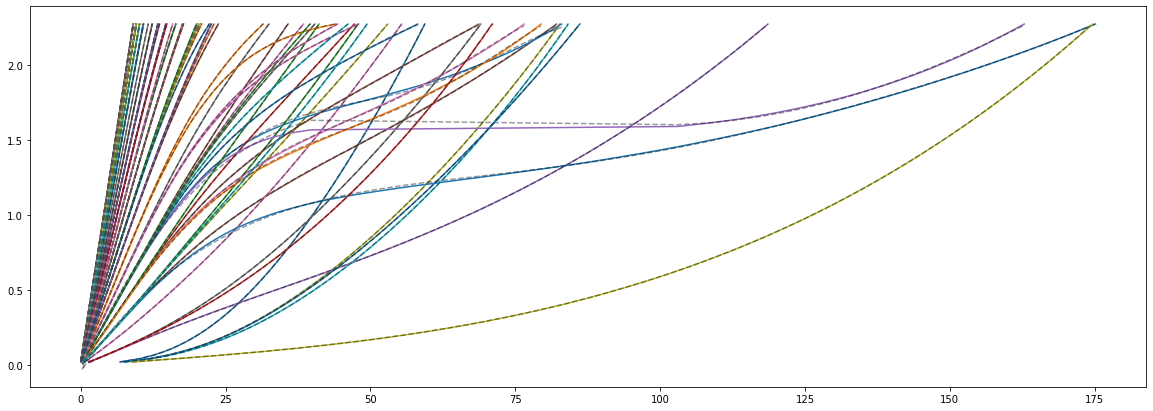

In [ ]:
# Trying to make polyfeatures
plt.figure(figsize=(20,7))
degree = 5

for i in np.arange(0,len(dData),100):

    heights = dData.iloc[i,4:104].values
    pressures = dData.iloc[i,104:-1].values
    
    heights_norm = (heights-heights.mean())/heights.std()


   
    coefs = np.polyfit(heights_norm, pressures, degree)
    
    plt.plot(heights,pressures)
    plt.plot(heights,np.polyval(coefs, heights_norm), 'k--', linewidth=1.5, alpha=0.4)


In [ ]:
def make_coef_df(dData, degree=4,  log_x=False):
    mC = dData.iloc[:,1:4]
    N = dData.shape[0]
#     cols_names = [f'coef {j}' for j in range(degree)] # Using Sklearn
    cols_names = [f'coef {j}' for j in range(degree+1)] # Using Numpy

    df_coef = pd.DataFrame(columns=cols_names)

    for i in range(N):
        x = dData.iloc[i,4:104].values
        y = dData.iloc[i,104:-1].values
        #####
        if  log_x == True:
            x = np.log(x)
#             y = np.log(y)
        #####
    # Normalize X:
        x = (x-x.mean())/x.std()
#         y = (y-y.mean())/y.std()
        
        
#         df_coef = df_coef.append(dict(zip(cols_names, make_poly_coef(x, y, degree))), ignore_index=True) # Using Sklearn
        df_coef = df_coef.append(dict(zip(cols_names, np.polyfit(x, y, degree))), ignore_index=True) # Using Numpy 

    df_coef[['C1','C2','C3']] = mC
    
    return df_coef

In [ ]:
df_coef = make_coef_df(dData, degree=4, log_x=False)

In [ ]:
df_coef.head(5)

,coef 0,coef 1,coef 2,coef 3,coef 4,C1,C2,C3
0,-0.001911,-0.005577,0.002456,0.666048,1.148441,0.002750,0.000127,0.000001
1,-0.000080,-0.010234,-0.014842,0.675448,1.162975,0.002124,0.000111,0.000001
2,0.004816,0.057003,-0.073356,0.567328,1.203804,0.000665,0.000048,0.000001
3,0.010386,-0.026357,-0.124697,0.739509,1.261150,0.001499,0.000025,0.000001
4,0.005873,0.017272,-0.024486,0.625696,1.161066,0.000665,0.000087,0.000001


In [ ]:
df_coef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   coef 0  8001 non-null   float64
 1   coef 1  8001 non-null   float64
 2   coef 2  8001 non-null   float64
 3   coef 3  8001 non-null   float64
 4   coef 4  8001 non-null   float64
 5   C1      8001 non-null   float64
 6   C2      8001 non-null   float64
 7   C3      8001 non-null   float64
dtypes: float64(8)
memory usage: 500.2 KB


In [ ]:
df_coef.describe()

,coef 0,coef 1,coef 2,coef 3,coef 4,C1,C2,C3
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8.001000e+03
mean,-0.001639,0.009974,-0.016125,0.665005,1.160176,0.002020,0.000076,1.039706e-06
std,0.022186,0.085075,0.130992,0.076725,0.086331,0.001202,0.000045,5.829961e-07
min,-0.746456,-0.031336,-3.346202,-0.757544,0.812148,0.000040,0.000002,8.000000e-08
25%,-0.002773,-0.010341,-0.039026,0.658426,1.142325,0.001082,0.000041,5.850000e-07
50%,-0.000908,-0.004466,-0.000432,0.667846,1.151072,0.001916,0.000072,9.890000e-07
75%,0.002643,-0.000371,0.010520,0.683038,1.181547,0.002958,0.000111,1.490000e-06
max,0.017098,3.235329,0.818505,2.010904,1.961844,0.004000,0.000150,2.000000e-06


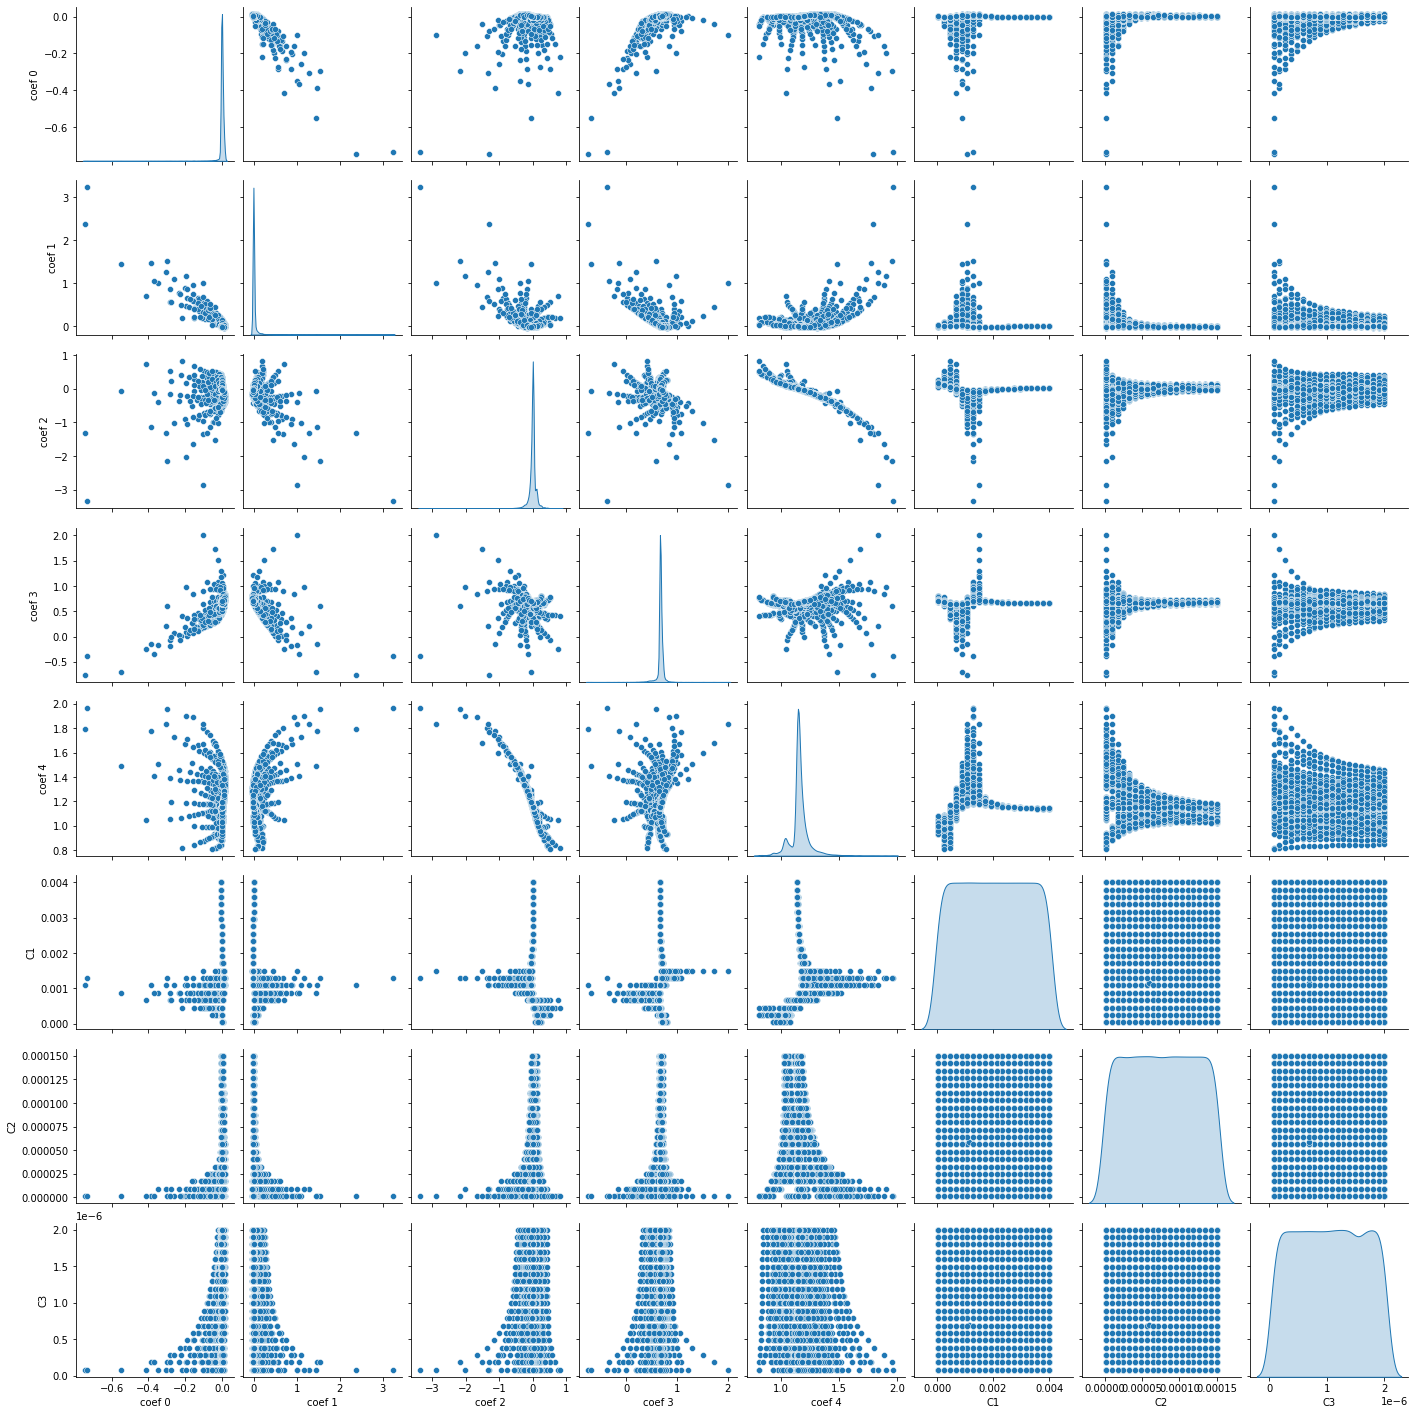

In [ ]:
sns.pairplot(df_coef, diag_kind='kde');

# Now let's test some regression models

In [ ]:
def make_X_y(df_coef,norm_x=True, norm_y=False):
    cols_names = df_coef.columns[:-3]
    vY = df_coef[['C1','C2','C3']].values
    mX = df_coef[cols_names].values
    # Normalize - keeping the values aside
    μ_x = mX.mean(0)
    σ_x = mX.std(0)
    μ_y = vY.mean(0)
    σ_y = vY.std(0)
    if norm_x == True:
        mX = (mX - μ_x)/σ_x
    if norm_y == True:
        vY = (vY - μ_y)/σ_y
    return mX, vY, μ_x, σ_x, μ_y, σ_y


In [ ]:
mX.shape

NameError: name 'mX' is not defined

In [ ]:
# Trying a simple validation:
mX, vY, μ_x, σ_x, μ_y, σ_y  = make_X_y(df_coef, norm_y=False)

mX_train, mX_test, vY_train, vY_test = train_test_split(mX, vY, test_size=0.25)#, random_state=23 )
print((mX_train.shape, mX_test.shape, vY_train.shape, vY_test.shape))

regressor = RandomForestRegressor(n_estimators=25)

regressor.fit(mX_train, vY_train)
score = regressor.score(mX_test, vY_test)

print(f'simple validating score: {score*100:0.2f}%')

In [ ]:
# Cross Validation:
N = len (df_coef)

vY_hat = cross_val_predict(RandomForestRegressor(n_estimators=25), mX, vY, cv=KFold(10, shuffle=True), n_jobs=-1)
score = r2_score(vY, vY_hat)

print(f'cross validation score: {score*100:0.2f}%')

# Trying to separate C1,2 from C3
### The problem is that C1,2 are having better results than C3

In [ ]:
# Fitting C1,C2:
regressor_12 = RandomForestRegressor(n_estimators=25)
regressor_12.fit(mX_train, vY_train[:,:2])
c12_score = regressor_12.score(mX_test, vY_test[:,:2])

print(f'simple validating score for C1,2: {c12_score*100:0.2f}%')

### Trying different regressors for C3 - alone

In [ ]:
#-- Regressors:
lModels  = []
lModels += [(LinearRegression         (), 'Linear Regression' )]
lModels += [(Lasso                    (), 'Lasso'             )]
lModels += [(SVR                      (kernel='rbf'), 'SVR'               )]
lModels += [(KNeighborsRegressor      (), 'KNN'               )]
lModels += [(RandomForestRegressor    (), 'Random Forest'     )]
lModels += [(AdaBoostRegressor        (), 'Ada boost'         )]
lModels += [(GradientBoostingRegressor(), 'Gradient Boosting' )]

N = len(vY)
for (regressor_3, name) in lModels:
    vY_hat = cross_val_predict(regressor_3, mX, vY[:,2], cv=KFold(5, shuffle=True), n_jobs=-1)
    score_c3 = r2_score(vY[:,2], vY_hat)
    print(f'{name:19s} = {100*score_c3:2.2f}%')

### Random Forest and KNN have the best results. les't cross validate

#### Random Forest

In [ ]:
# Cross validating n_estimators (using Out of bag score):
df_random_forest_cv = pd.DataFrame(columns=['n_est', 'r2 score'])
print('n_est         score')
for n_est in [25, 40, 80, 120, 250]:
    regressor_3 = RandomForestRegressor(n_estimators=n_est, oob_score=True).fit(mX, vY[:,2])
    score_c3 = regressor_3.oob_score_
    print(f'{n_est}      =     {100*score_c3:2.2f}%')

In [ ]:
# Cross validating tree depth:

df_random_forest_cv = pd.DataFrame(columns=['n_est', 'r2 score'])
print('depth         score')
for dep in range(2,150,10):
    regressor_3 = RandomForestRegressor(n_estimators=80, max_depth=dep, oob_score=True).fit(mX, vY[:,2])
    score_c3 = regressor_3.oob_score_
    print(f'{dep}      =     {100*score_c3:2.2f}%')

depth         score
2      =     4.26%
12      =     20.65%
22      =     36.12%
32      =     49.51%
42      =     60.15%
52      =     68.33%
62      =     76.80%
72      =     78.16%
82      =     80.36%
92      =     81.25%
102      =     81.92%
112      =     81.88%
122      =     82.37%
132      =     82.18%
142      =     82.41%


In [ ]:
# Optimal n_estimators, max_depth for random forest = 120?
regressor_3 = RandomForestRegressor(n_estimators=120, max_depth=120 ,oob_score=True).fit(mX, vY[:,2])
score_c3 = regressor_3.oob_score_
print(f'cross validation score: {score_c3*100:0.2f}%')

cross validation score: 82.63%


#### K Nearest neighbors

In [ ]:
# Random Forest and KNN have the best results. les't cross validate
df_knn_cv = pd.DataFrame(columns=['neighbors', 'r2 score'])
for neighbors in np.arange(1,60):
    vY_pred = cross_val_predict(KNeighborsRegressor(n_neighbors=neighbors), mX, vY[:,2], cv=KFold(5, shuffle=True))
    score_c3 = r2_score(vY[:,2], vY_pred)
    df_knn_cv.loc[len(df_knn_cv)] = [neighbors, score_c3*100]
df_knn_cv.sort_values(by='r2 score', inplace=True, ascending=False)
df_knn_cv.head()

In [ ]:
# Optimal neigbors for random forest = 1?
vY_pred = cross_val_predict(KNeighborsRegressor(n_neighbors=1), mX, vY[:,2], cv=KFold(5, shuffle=True))
score_c3 = r2_score(vY[:,2], vY_pred)
print(f'cross validation score: {score_c3*100:0.2f}%')

# Predicting C123

In [ ]:
# With seperation:
regressor_12 = RandomForestRegressor(n_estimators=120, max_depth=120)
regressor_3 = KNeighborsRegressor(n_neighbors=1)

regressor_12.fit(mX_train, vY_train[:,:2])
regressor_3.fit(mX_train, vY_train[:,2])

vY_test_pred = np.zeros((len(mX_test),3))
vY_test_pred[:,:2] = regressor_12.predict(mX_test)
vY_test_pred[:,2]  = regressor_3 .predict(mX_test)

score = r2_score(vY_test, vY_test_pred)
print(f'simple validation score: {score*100:0.2f}%')

In [ ]:
# Without seperaion:
regressor = RandomForestRegressor().fit(mX_train, vY_train)
vY_test_pred  = regressor.predict(mX_test)

score = r2_score(vY_test, vY_test_pred)
print(f'simple validation score: {score*100:0.2f}%')

### Conclusion: not to seperate

In [ ]:
# Printing an example of the prediction:
sample_i = np.random.randint(0, len(mX_test))
c_pred = np.zeros((3,))
c_pred = (regressor.predict([mX_test[sample_i,:]])).squeeze()
c_real = vY_test[sample_i,:]
print('predicted:')
print(f'C1: {c_pred[0]:0.3e} || C2:{c_pred[1]:0.3e} || C3:{c_pred[2]:0.3e}')
print('actual:')
print(f'C1: {c_real[0]:0.3e} || C2:{c_real[1]:0.3e} || C3:{c_real[2]:0.3e}')

# Testing with real data (experiment)

In [ ]:
exp_df = pd.read_csv('./data/EPN40_8AX_04_aug_2021_17_08.csv')
exp_df

## Trying to fit the data

In [ ]:
plt.figure(figsize=(12,10))

x_exp  = exp_df['Height [mm]'].values
y_exp  = exp_df['Pressure [Atm]'].values

x_exp_norm = (x_exp - np.mean(x_exp)) / np.std(x_exp)
coefs_exp = np.polyfit(x_exp_norm, y_exp, degree) # Looks as the best one

plt.plot(x_exp, y_exp,'.')
y_poly = np.polyval(coefs_exp, x_exp_norm)

plt.plot(x_exp,y_poly, 'g--')

### There are not enough points at the top

In [ ]:
def dist_unifier(x, y, bins=10, noise_level_x=0.05, noise_level_y=0.005):
    # Unifieng the data distribution
    unifier_qty, unifer_bins = np.histogram(x, bins=bins)
    unifier_mul = unifier_qty.max() // unifier_qty
    unifier_mul

    N = len(x)
    new_N = (unifier_qty*unifier_mul).sum()

    output_x = np.array([])
    output_y = np.array([])
    
    # Adding points:
    for i in range(len(unifier_qty)):

        idx_bin_i = (x > unifer_bins[i]) & (x <= unifer_bins[i+1]) 

        output_x = np.hstack([output_x, np.repeat(x[idx_bin_i], unifier_mul[i])])
        output_y = np.hstack([output_y, np.repeat(y[idx_bin_i], unifier_mul[i])])
        
    # Adding noise:
    eps_x = np.random.randn(len(output_x))/output_x.std()
    eps_y = np.random.randn(len(output_y))/output_y.std()
    eps_x *= noise_level_x
    eps_y *= noise_level_y

    output_x += eps_x
    output_y += eps_y
    order_idx = np.argsort(output_x)
    output_x = output_x[order_idx]
    output_y = output_y[order_idx]
    
    # Removing points:
    output_x = output_x[::new_N//N]
    output_y = output_y[::new_N//N]
    
    return output_x, output_y
    

In [ ]:
plt.hist(x_exp);
plt.hist(dist_unifier(x_exp,y_exp)[0], alpha=0.5);

In [ ]:
plt.figure(figsize=(15,10))


x_exp = exp_df.iloc[:,0].dropna().values
y_exp = exp_df.iloc[:,1].dropna().values
plt.plot(x_exp,y_exp)
x_exp, y_exp = dist_unifier(x_exp,y_exp, noise_level_y=0.01)
coefs_exp = np.polyfit(x_exp, y_exp, deg=degree) # Using Numpy 
y_exp_hat = np.polyval(coefs_exp, x_exp)

plt.plot(x_exp, y_exp,'.', alpha=0.05)
plt.plot(x_exp, y_exp_hat)


## Plotting the experiment on the dataset

In [ ]:
plt.figure(figsize=(20,7))
degree = 8
def make_ploy(vX, degree):
    N = len(vX)
    x_poly = np.zeros((N, degree))
    for d in np.arange(degree):
        x_poly[:, d] = np.power(vX,d + 1)
    return x_poly
        

for i in np.arange(0,len(dData),65):
# for i in [850]:

# for i in [800]:
    heights = dData.iloc[i,4:104].values
    pressures = dData.iloc[i,104:-1].values


#     poly = PolynomialFeatures(degree, include_bias=False)
#     X = poly.fit_transform(heights[:,None])

    X = make_ploy(heights, degree)
    mu_x = np.mean(X, axis=0)
    std_x = np.std(X, axis=0)
    X = (X-mu_x)/std_x
    poly_fit_reg = LinearRegression()
    poly_fit_reg.fit(X, pressures)
    pressures_hat = poly_fit_reg.predict(X)
    
#     coefs = np.polyfit(heights, pressures, degree)
    
    plt.plot(heights,pressures)
    plt.plot(heights,pressures_hat, '--')
#     plt.plot(heights,np.polyval(coefs, heights), '--', color='#808080')

plt.plot(x_exp, y_exp_hat, 'k', linewidth=3)    
    
# Ploy Features - made some problems, so a manual implimitation was better

# Trying to fit the experiment results

In [ ]:
# Retraining the data
degree=4 # The hyper parameter
log_x = True
norm_x = True
norm_y = True
df_coef = make_coef_df(dData, degree=degree, log_x=log_x)
mX, vY, μ_x, σ_x, μ_y, σ_y  = make_X_y(df_coef, norm_x=norm_x, norm_y=norm_y)

regressor = RandomForestRegressor(n_estimators=120, max_depth=120)
regressor.fit(mX, vY)

In [ ]:
# Preparing the experiment data:
x_exp = exp_df.iloc[:,0].dropna().values
y_exp = exp_df.iloc[:,1].dropna().values
x_exp, y_exp = dist_unifier(x_exp,y_exp, noise_level_y=0.01)
#####
if log_x == True:
    x_exp_log = np.log(x_exp)
    x_exp_norm = (x_exp_log - np.mean(x_exp_log)) / np.std(x_exp_log)
#####
else:
    x_exp_norm = (x_exp - np.mean(x_exp)) / np.std(x_exp)



coefs_exp = np.polyfit(x_exp_norm, y_exp, deg=degree) # Using Numpy 
if norm_x == True:
    coefs_exp = (coefs_exp - μ_x)/σ_x   
# Predicting C1, C2, C3:
C = regressor.predict(coefs_exp[None, :]).squeeze()
if norm_y == True:
    C = C*σ_y + μ_y
    
print('predicted:')
print(f'C1: {C[0]:0.3e} || C2:{C[1]:0.3e} || C3:{C[2]:0.3e}')
print('given:')
print(f'C1: {0.0012006:0.3e} || C2:{2.48E-05:0.3e} || C3:{-8.38E-08:0.3e}')

In [ ]:
# Plot predicted vs. experiment (using matlab)
fea_res = pd.read_csv('./matlab_code/test.csv', header=None).values.squeeze()
fea_heghits = fea_res[3:103]
fea_pressures = fea_res[103:]

plt.plot(fea_heghits, fea_pressures)

plt.plot(x_exp,y_exp)